## Sports Ball Image Recognition

With deep learning, this model observes images and identifies which sport a ball is from. Transfer learning was used on a convoluted neural network trained on ResNet-34. Code was referenced from a tutorial by Francisco Ingham and Jeremy Howard: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sports-ball-images/baseball_validation.jpg
/kaggle/input/sports-ball-images/poolballs/images (8).jpg
/kaggle/input/sports-ball-images/poolballs/2Q__ (1).jpg
/kaggle/input/sports-ball-images/poolballs/Z.jpg
/kaggle/input/sports-ball-images/poolballs/images (32).jpg
/kaggle/input/sports-ball-images/poolballs/images (18).jpg
/kaggle/input/sports-ball-images/poolballs/images (16).jpg
/kaggle/input/sports-ball-images/poolballs/images (47).jpg
/kaggle/input/sports-ball-images/poolballs/images (13).jpg
/kaggle/input/sports-ball-images/poolballs/images (48).jpg
/kaggle/input/sports-ball-images/poolballs/9k_ (7).jpg
/kaggle/input/sports-ball-images/poolballs/2Q__ (3).jpg
/kaggle/input/sports-ball-images/poolballs/images (7).jpg
/kaggle/input/sports-ball-images/poolballs/2Q__ (5).jpg
/kaggle/input/sports-ball-images/poolballs/Z (8).jpg
/kaggle/input/sports-ball-images/poolballs/images.jpg
/kaggle/input/sports-ball-images/poolballs/images (43).jpg
/kaggle/input/sports-ball-images/po

In [2]:
proj_path = '/kaggle/input/sports-ball-images/'

folders = ['airhockeypucks', 'baseballs', 'basketballs', 'bowlingballs', 'cricketballs', 'footballs', 'golfballs', 'hockeypucks', 'lacrosseballs', 'poolballs', 'rugbyballs', 'soccerballs', 'softballs', 'tennisballs', 'volleyballs']
for i in folders:
    path = Path(proj_path)
    (path/i).mkdir(parents=True, exist_ok=True)
    
p_path = Path(proj_path)

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=.2, ds_tfms=get_transforms(), 
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['airhockeypucks',
 'baseballs',
 'basketballs',
 'bowlingballs',
 'cricketballs',
 'footballs',
 'golfballs',
 'hockeypucks',
 'lacrosseballs',
 'poolballs',
 'rugbyballs',
 'soccerballs',
 'softballs',
 'sports-ball-images',
 'tennisballs',
 'volleyballs']

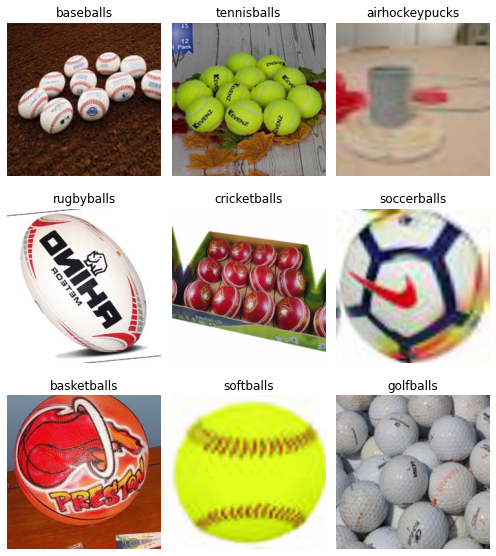

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airhockeypucks',
  'baseballs',
  'basketballs',
  'bowlingballs',
  'cricketballs',
  'footballs',
  'golfballs',
  'hockeypucks',
  'lacrosseballs',
  'poolballs',
  'rugbyballs',
  'soccerballs',
  'softballs',
  'sports-ball-images',
  'tennisballs',
  'volleyballs'],
 16,
 832,
 207)

I will be using a convolutional neural net learner and transfer learning on the ResNet34 pre-trained model. Transfer learning allows me to fix the end of the pre-trained model for my own use. The metric used is error rate, which is 1 - accuracy.

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
# 8 epochs
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.660690,1.684891,0.449275,02:35
1,2.395208,0.916156,0.241546,02:37
2,1.661167,0.753802,0.202899,02:43
3,1.223507,0.747331,0.169082,02:37
4,0.960773,0.727549,0.173913,02:42
5,0.765651,0.723810,0.173913,02:37
6,0.623616,0.721905,0.164251,02:43
7,0.509450,0.727368,0.164251,02:39


Saving the newly built model.

In [9]:
learn.model_dir = "/kaggle/working"
learn.save('model1_34', return_path=True)

PosixPath('/kaggle/working/model1_34.pth')

Unfreezing to retrain the model.

In [10]:
learn.unfreeze()

To find an optimal learning rate.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


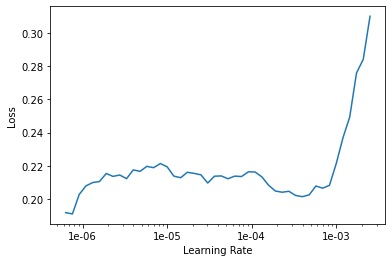

In [11]:
learn.lr_find()
learn.recorder.plot()

Testing to see if changing the learning rate gets better accuracies. We want a steep learning rate: about 1e-6 and 1e-4.

In [12]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.221620,0.722039,0.169082,03:44
1,0.205976,0.714493,0.164251,03:44


Within the first epoch, our error rate decreased.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


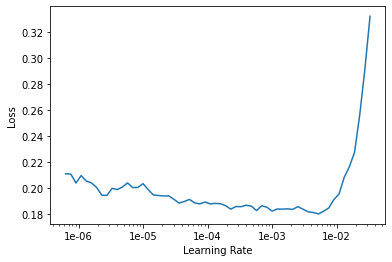

In [13]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

Saving the new model.

In [14]:
learn.save('model2_34')

Confusion matrix to interpret the model's predictions.

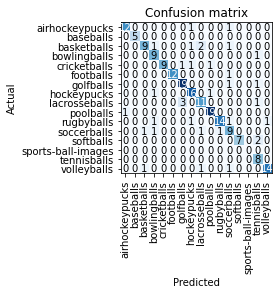

In [15]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Finding the most incorrect predictions.

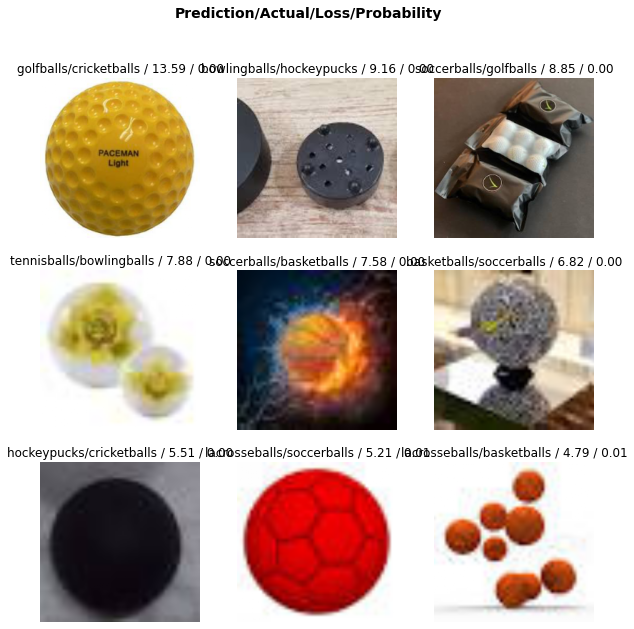

In [16]:
interp.plot_top_losses(9, figsize=(10,10))

Classifying an image.

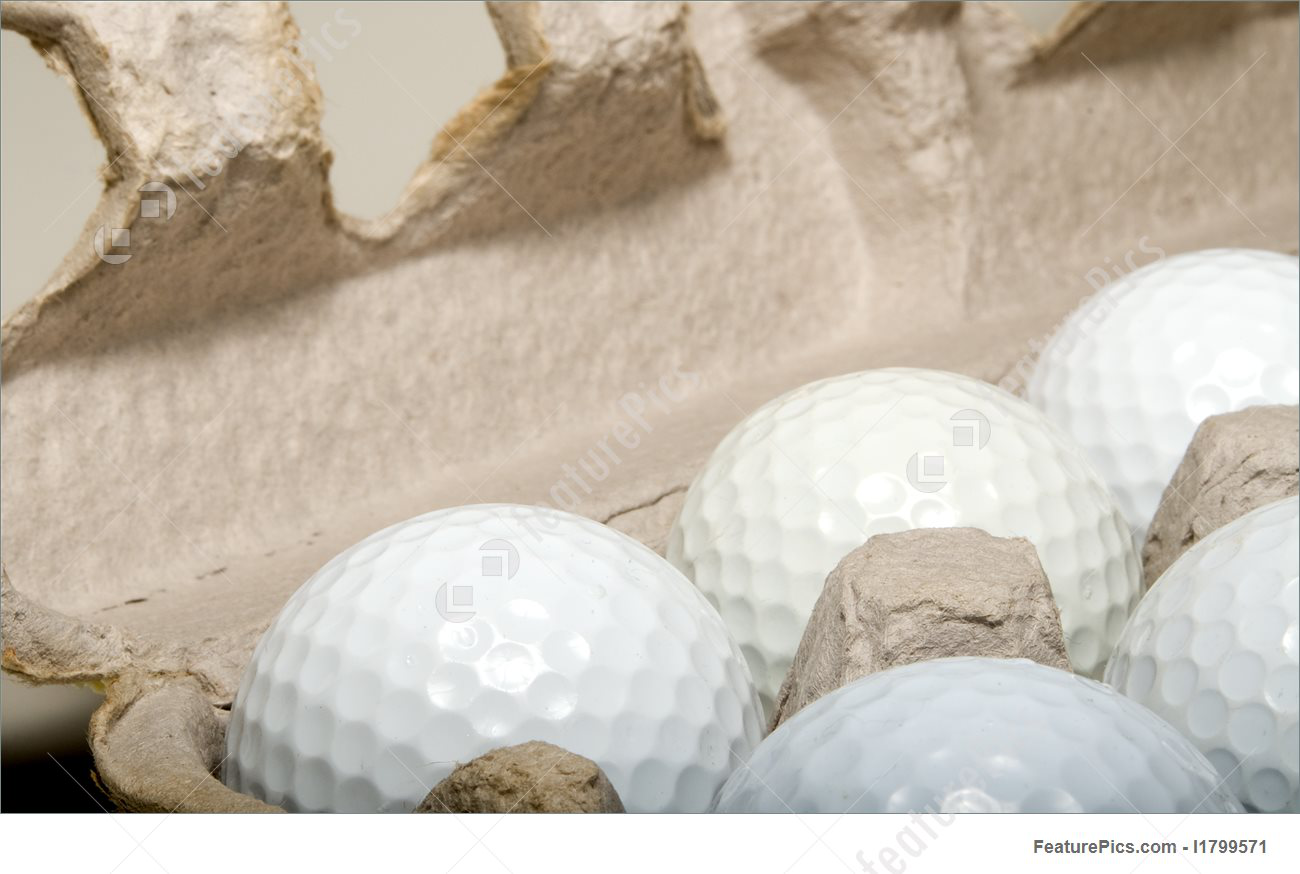

Category sports-ball-images

In [17]:
img_baseball = open_image(Path(p_path)/'baseball_validation.jpg')
display(img_baseball)

pred_class, pred_idx, outputs = learn.predict(img_baseball)
pred_class

> The issue is that the root folder 'sports-ball-images' is included as a class and therefore plays a strong roll in categorizing. I am working on fixing this.

### With very minimal fine-tuning, this image recognition model received an error rate of .18. To further improve my model, I would first need to add more images to my dataset because I believe the amount I have collected would not be enough to train classifiers sufficiently to distinguish such similar objects, and see how big of an effect that causes first.